# Compare Models

In [61]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [62]:
plt.style.use('seaborn-v0_8-whitegrid')

In [63]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
result_df = pd.read_csv("/content/drive/MyDrive/Final Exam ML/source codes/result_metrics.csv")
result_df

,Model,Accuracy,Precision,Recall,F1-Score
0,CART,0.821229,0.862745,0.637681,0.733333
1,Random Forest,0.815642,0.800000,0.695652,0.744186
2,Naive Bayes,0.793296,0.750000,0.695652,0.721805
3,SVM,0.843575,0.825397,0.753623,0.787879
4,AdaBoost,0.815642,0.772727,0.739130,0.755556
5,GradientBoost,0.810056,0.777778,0.710145,0.742424
6,Logistic Regression,0.849162,0.828125,0.768116,0.796992


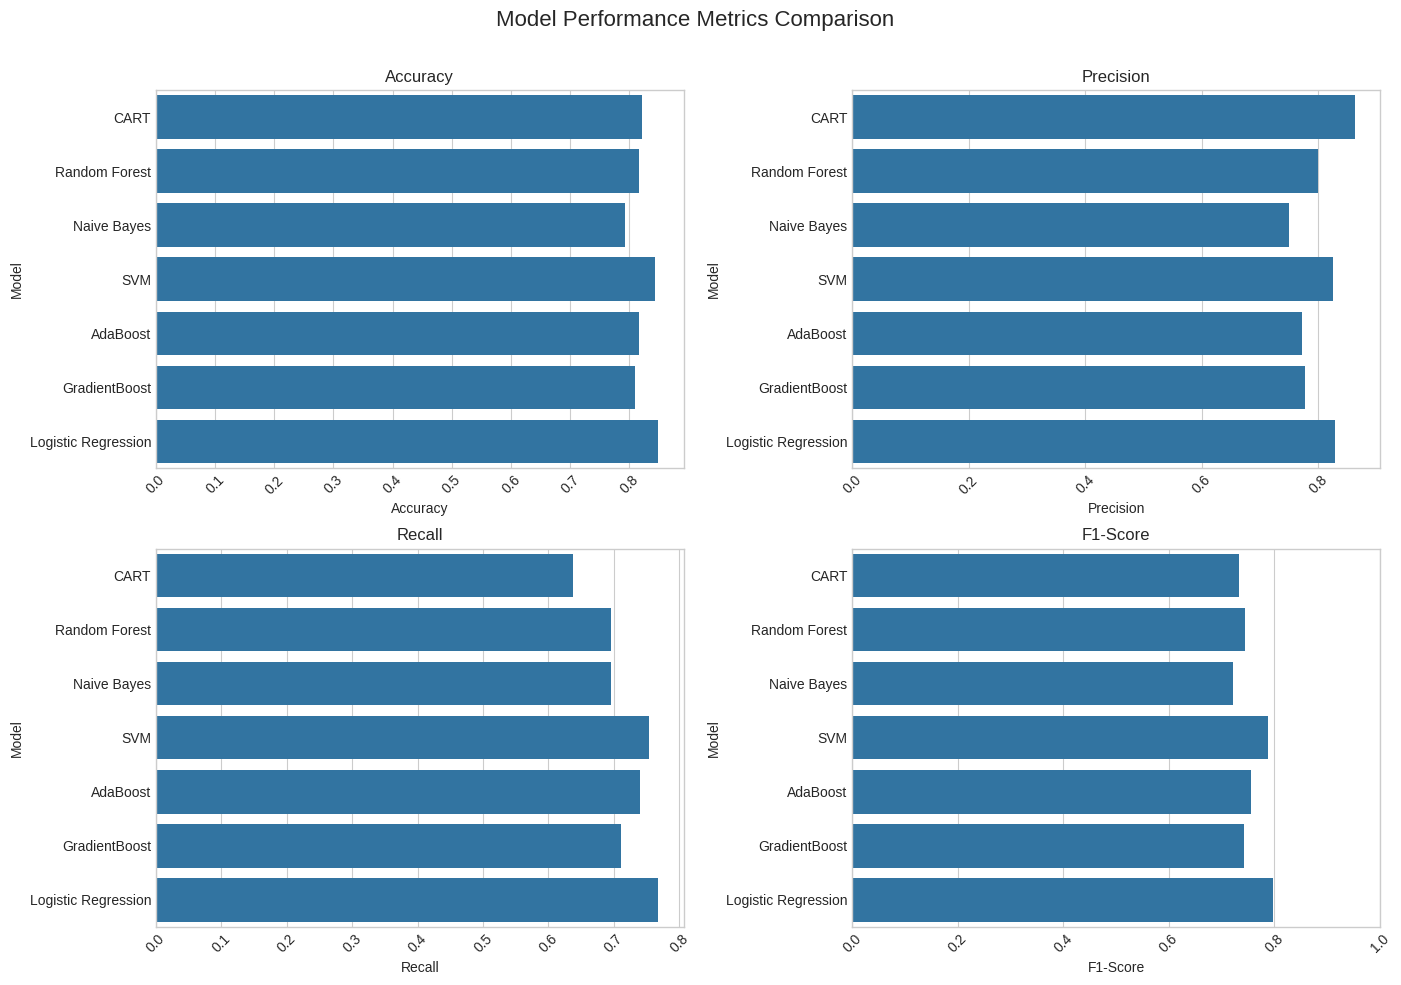

In [50]:
# Create a figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Model Performance Metrics Comparison", fontsize=16)

# Plot Accuracy
sns.barplot(y="Model", x="Accuracy", data=result_df, ax=axes[0, 0])
axes[0, 0].set_title("Accuracy")
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot Precision
sns.barplot(y="Model", x="Precision", data=result_df, ax=axes[0, 1])
axes[0, 1].set_title("Precision")
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot Recall
sns.barplot(y="Model", x="Recall", data=result_df, ax=axes[1, 0])
axes[1, 0].set_title("Recall")
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot F1-Score
sns.barplot(y="Model", x="F1-Score", data=result_df, ax=axes[1, 1])
axes[1, 1].set_title("F1-Score")
axes[1, 1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust the top margin for the suptitle

plt.xlim((0,1))
# Show the plots
plt.show()

In [51]:
print(f"Model with Highest Accuracy: {result_df.loc[result_df['Accuracy'].idxmax(), 'Model']}")
print(f"Model with Highest Precision: {result_df.loc[result_df['Precision'].idxmax(), 'Model']}")
print(f"Model with Highest Recall: {result_df.loc[result_df['Recall'].idxmax(), 'Model']}")
print(f"Model with Highest F1-Score: {result_df.loc[result_df['F1-Score'].idxmax(), 'Model']}")

Model with Highest Accuracy: Logistic Regression
Model with Highest Precision: CART
Model with Highest Recall: Logistic Regression
Model with Highest F1-Score: Logistic Regression


# Re-train Logistic Regression Model

In [52]:
np.random.seed(21)

In [53]:
train_df = pd.read_csv('/content/drive/MyDrive/Final Exam ML/datasets/cleaned-data/data_v2/train.csv', index_col='PassengerId')
val_df = pd.read_csv('/content/drive/MyDrive/Final Exam ML/datasets/cleaned-data/data_v2/val.csv', index_col='PassengerId')
test_df = pd.read_csv('/content/drive/MyDrive/Final Exam ML/datasets/cleaned-data/data_v2/test.csv', index_col='PassengerId')

In [54]:
numerical_features = ['Age', 'Fare', 'FamilySize']
categorical_features = ['Pclass', 'Sex', 'Embarked', 'Title_Name']

features = numerical_features + categorical_features

In [55]:
# Extract features and Label
X_train = train_df[features]
y_train = train_df['Survived']

X_val = val_df[features]
y_val = val_df['Survived']

X_test = test_df[features]

In [56]:
# Create a Preprocessing Pipeline
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define and Train the Logistic Regression Model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(C=4.893900918477489, class_weight=None, max_iter=100, solver='liblinear'))
])

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Fare',
                                                   'FamilySize']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Pclass', 'Sex', 'Embarked',
                                                   'Title_Name'])])),
                ('classifier',
                 LogisticRegression(C=4.893900918477489, solver='liblinear'))])

In [57]:
y_pred_val = model.predict(X_val)

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       110
           1       0.83      0.77      0.80        69

    accuracy                           0.85       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.85      0.85      0.85       179



In [59]:
y_pred = model.predict(X_test)
test_df['Survived'] = y_pred
test_df

,Age,Fare,FamilySize,Pclass,Sex,Embarked,Title_Name,Survived
PassengerId,,,,,,,,
892,34.5,7.8292,1,3,male,Q,Mr,0
893,47.0,7.0000,2,3,female,S,Mrs,1
894,62.0,9.6875,1,2,male,Q,Mr,0
895,27.0,8.6625,1,3,male,S,Mr,0
896,22.0,12.2875,3,3,female,S,Mrs,1
...,...,...,...,...,...,...,...,...
1305,24.0,8.0500,1,3,male,S,Mr,0
1306,39.0,108.9000,1,1,female,C,Others,1
1307,38.5,7.2500,1,3,male,S,Mr,0


# Write to Submisstion file

In [60]:
test_df['Survived'].to_csv("/content/drive/MyDrive/Final Exam ML/source codes/submisstion.csv", index = 'PassengerId')